<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng03/A03_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Made by Boris Oskolkov for Assignment03 (CS5783)

In [62]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd 
pd.options.mode.chained_assignment = None

First, we will load MNIST dataset and prepare it.

In [28]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Scale images to the [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [29]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [30]:
input_shape = (28, 28, 1)

Model0 - number of filters ascending with every layer.

In [50]:
model0 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(48, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(96, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(112, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(144, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(160, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model0.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 28, 28, 8)         80        
                                                                 
 conv2d_117 (Conv2D)         (None, 28, 28, 16)        1168      
                                                                 
 conv2d_118 (Conv2D)         (None, 28, 28, 32)        4640      
                                                                 
 conv2d_119 (Conv2D)         (None, 28, 28, 48)        13872     
                                                                 
 conv2d_120 (Conv2D)         (None, 28, 28, 64)        27712     
                                                                 
 conv2d_121 (Conv2D)         (None, 28, 28, 80)        46160     
                                                                 
 conv2d_122 (Conv2D)         (None, 28, 28, 96)      

Model1 - number of filters descending with every layer.

In [51]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(160, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(144, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(112, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(96, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(48, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, 28, 28, 160)       1600      
                                                                 
 conv2d_128 (Conv2D)         (None, 28, 28, 144)       207504    
                                                                 
 conv2d_129 (Conv2D)         (None, 28, 28, 128)       166016    
                                                                 
 conv2d_130 (Conv2D)         (None, 28, 28, 112)       129136    
                                                                 
 conv2d_131 (Conv2D)         (None, 28, 28, 96)        96864     
                                                                 
 conv2d_132 (Conv2D)         (None, 28, 28, 80)        69200     
                                                                 
 conv2d_133 (Conv2D)         (None, 28, 28, 64)      

Model2 - number of filters ascending until midpart and descending therefore.

In [52]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(48, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(80, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(48, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 28, 28, 8)         80        
                                                                 
 conv2d_139 (Conv2D)         (None, 28, 28, 16)        1168      
                                                                 
 conv2d_140 (Conv2D)         (None, 28, 28, 32)        4640      
                                                                 
 conv2d_141 (Conv2D)         (None, 28, 28, 48)        13872     
                                                                 
 conv2d_142 (Conv2D)         (None, 28, 28, 64)        27712     
                                                                 
 conv2d_143 (Conv2D)         (None, 28, 28, 80)        46160     
                                                                 
 conv2d_144 (Conv2D)         (None, 28, 28, 128)     

I will try different optimizers and will choose best one for every model.

In [45]:
batch_size = 64
epochs = 1
optimizers = ["adam", "SGD", "RMSProp"]
i=0
opt_comp_tbl = pd.DataFrame(np.zeros((3, len(optimizers))), columns=optimizers, dtype = float)
for opt in optimizers:
    print(f'Tryng {opt} optimizier')
    print(f'Model 0: working...')
    model0.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    opt_comp_tbl[opt][i]=model0.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    print(f'Model 1: working...')
    model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    opt_comp_tbl[opt][i+1]=model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    print(f'Model 2: working...')
    model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    opt_comp_tbl[opt][i+2]=model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    for j in range(3):
      opt_comp_tbl[opt][j] = opt_comp_tbl[opt][j].history.get('val_accuracy')[-1]



Tryng adam optimizier
Model 1:
Model 2:
Model 3:
Tryng SGD optimizier
Model 1:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Model 2:
Model 3:
Tryng RMSProp optimizier
Model 1:
Model 2:
Model 3:


In [54]:
print("Validation accuracy between several optimizers")
print(opt_comp_tbl)

Validation accuracy for between several optimizers
     adam     SGD RMSProp
0  0.9929  0.9951  0.9935
1  0.9809  0.9876   0.981
2  0.9829   0.988  0.9864


Best perfomance showed SGD optimizer. Let's adjust other hyperparameters.

In [60]:
model0.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

batch_sizes = [32,64,128,256]
batch_comp_tbl = pd.DataFrame(np.zeros((3, len(batch_sizes))), columns=batch_sizes, dtype = float)
for b in batch_sizes:
    print(f'Tryng batch size={b}.')
    print(f'Model 0: working...')
    batch_comp_tbl[b][i]=model0.fit(x_train, y_train, batch_size=b, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    print(f'Model 1: working...')
    batch_comp_tbl[b][i+1]=model1.fit(x_train, y_train, batch_size=b, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    print(f'Model 2: working...')
    batch_comp_tbl[b][i+2]=model2.fit(x_train, y_train, batch_size=b, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    for j in range(3):
      batch_comp_tbl[b][j] = batch_comp_tbl[b][j].history.get('val_accuracy')[-1]

Tryng batch size=32.
Model 0: working...
Model 1: working...
Model 2: working...
Tryng batch size=64.
Model 0: working...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Model 1: working...
Model 2: working...
Tryng batch size=128.
Model 0: working...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Model 1: working...
Model 2: working...
Tryng batch size=256.
Model 0: working...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Model 1: working...
Model 2: working...


In [64]:
print("Validation accuracy between several batch sizes")
print(batch_comp_tbl)

Validation accuracy between several batch sizes
      32      64      128     256
0  0.9876  0.9908  0.9921  0.9917
1  0.9728  0.9784  0.9816  0.9829
2  0.9724  0.9755  0.9796  0.9818


Best perfomance showed 128, 256, 256 batch size for model 0, 1, 2 correspondingly. Let's adjust learning rate.

In [70]:
custom_opt=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False
)
learning_rates = [0.05,0.01,0.005,0.001]
lr_comp_tbl = pd.DataFrame(np.zeros((3, len(learning_rates))), columns=learning_rates, dtype = float)
for lr in learning_rates:
    print(f'Trying learning rate={lr}.')
    custom_opt=tf.keras.optimizers.SGD(learning_rate=lr)
    model0.compile(loss="categorical_crossentropy", optimizer=custom_opt, metrics=["accuracy"])
    model1.compile(loss="categorical_crossentropy", optimizer=custom_opt, metrics=["accuracy"])
    model2.compile(loss="categorical_crossentropy", optimizer=custom_opt, metrics=["accuracy"])
    print(f'Model 0: working...')
    lr_comp_tbl[lr][i]=model0.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    print(f'Model 1: working...')
    lr_comp_tbl[lr][i+1]=model1.fit(x_train, y_train, batch_size=256, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    print(f'Model 2: working...')
    lr_comp_tbl[lr][i+2]=model2.fit(x_train, y_train, batch_size=256, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    for j in range(3):
      lr_comp_tbl[lr][j] = lr_comp_tbl[lr][j].history.get('val_accuracy')[-1]

Trying learning rate=0.05.
Model 0: working...
Model 1: working...
Model 2: working...
Trying learning rate=0.01.
Model 0: working...
Model 1: working...
Model 2: working...
Trying learning rate=0.005.
Model 0: working...
Model 1: working...
Model 2: working...
Trying learning rate=0.001.
Model 0: working...
Model 1: working...
Model 2: working...


In [73]:
print("Validation accuracy between several learning rates:")
print(lr_comp_tbl)

Validation accuracy between several learning rates
    0.050   0.010   0.005   0.001
0   0.992  0.9935  0.9937  0.9939
1  0.9613  0.9762   0.977  0.9776
2  0.9377  0.9658  0.9705  0.9709


In [22]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 7.6 MB/s 


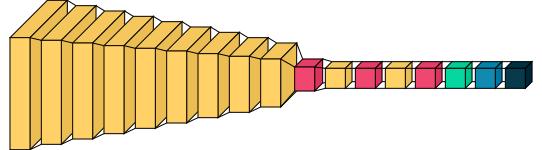

In [23]:

visualkeras.layered_view(model1)


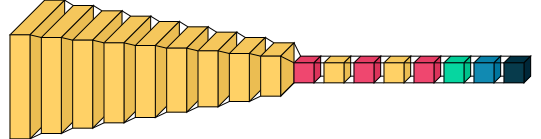

In [37]:
visualkeras.layered_view(model2)


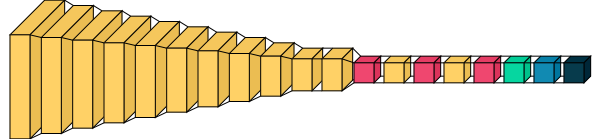

In [47]:
visualkeras.layered_view(model3)

------start second problem------

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Scale images to the [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# # Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

170498071/170498071 [==============================] - 16s 0us/step


In [ ]:
x_train.shape


(50000, 32, 32, 3)

In [ ]:
input_shape = (32, 32, 3)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 120)             

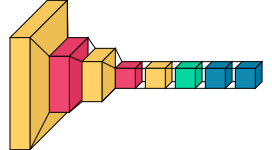

In [ ]:
model_lenet = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(6, kernel_size=(5, 5), activation="relu", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),  
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu", strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(120, kernel_size=(5, 5), activation="relu"),
        layers.Flatten(),
        layers.Dense(84, input_dim=4, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model_lenet.summary()
visualkeras.layered_view(model_lenet)

In [ ]:
custom_opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model_lenet.compile(loss="sparse_categorical_crossentropy", optimizer=custom_opt, metrics=["accuracy"])
model_lenet.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test), verbose=2)

Epoch 1/25
391/391 - 3s - loss: 1.7204 - accuracy: 0.3786 - val_loss: 1.5174 - val_accuracy: 0.4499 - 3s/epoch - 7ms/step
Epoch 2/25
391/391 - 2s - loss: 1.4368 - accuracy: 0.4833 - val_loss: 1.3591 - val_accuracy: 0.5153 - 2s/epoch - 5ms/step
Epoch 3/25
391/391 - 2s - loss: 1.3260 - accuracy: 0.5255 - val_loss: 1.2932 - val_accuracy: 0.5343 - 2s/epoch - 5ms/step
Epoch 4/25
391/391 - 2s - loss: 1.2482 - accuracy: 0.5539 - val_loss: 1.2691 - val_accuracy: 0.5430 - 2s/epoch - 5ms/step
Epoch 5/25
391/391 - 2s - loss: 1.1917 - accuracy: 0.5763 - val_loss: 1.2191 - val_accuracy: 0.5650 - 2s/epoch - 5ms/step
Epoch 6/25
391/391 - 2s - loss: 1.1526 - accuracy: 0.5907 - val_loss: 1.2654 - val_accuracy: 0.5565 - 2s/epoch - 5ms/step
Epoch 7/25
391/391 - 2s - loss: 1.1129 - accuracy: 0.6046 - val_loss: 1.1494 - val_accuracy: 0.5908 - 2s/epoch - 5ms/step
Epoch 8/25
391/391 - 2s - loss: 1.0791 - accuracy: 0.6165 - val_loss: 1.1467 - val_accuracy: 0.5940 - 2s/epoch - 5ms/step
Epoch 9/25
391/391 - 2s 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32, 32, 6)         24        
                                                                 
 dense_29 (Dense)            (None, 32, 32, 16)        112       
                                                                 
 dense_30 (Dense)            (None, 32, 32, 120)       2040      
                                                                 
 dense_31 (Dense)            (None, 32, 32, 84)        10164     
                                                                 
 flatten_3 (Flatten)         (None, 86016)             0         
                                                                 
 dense_32 (Dense)            (None, 10)                860170    
                                                                 
Total params: 872,510
Trainable params: 872,510
Non-tr

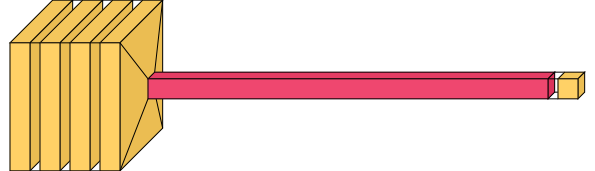

In [ ]:
model_ff = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(6, activation="relu"),
        layers.Dense(16, activation="relu"), 
        layers.Dense(120, activation="relu"),
        layers.Flatten(),
        layers.Dense(84, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model_ff.summary()
visualkeras.layered_view(model_ff)

In [ ]:
custom_opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model_ff.compile(loss="sparse_categorical_crossentropy", optimizer=custom_opt, metrics=["accuracy"])
model_ff.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test), verbose=2)

Epoch 1/25
391/391 - 8s - loss: 1.9794 - accuracy: 0.2738 - val_loss: 1.7982 - val_accuracy: 0.3720 - 8s/epoch - 20ms/step
Epoch 2/25
391/391 - 7s - loss: 1.7114 - accuracy: 0.3982 - val_loss: 1.6783 - val_accuracy: 0.4159 - 7s/epoch - 18ms/step
Epoch 3/25
391/391 - 7s - loss: 1.6154 - accuracy: 0.4375 - val_loss: 1.5920 - val_accuracy: 0.4466 - 7s/epoch - 18ms/step
Epoch 4/25
391/391 - 7s - loss: 1.5622 - accuracy: 0.4548 - val_loss: 1.5639 - val_accuracy: 0.4595 - 7s/epoch - 18ms/step
Epoch 5/25
391/391 - 8s - loss: 1.5280 - accuracy: 0.4687 - val_loss: 1.5667 - val_accuracy: 0.4498 - 8s/epoch - 20ms/step
Epoch 6/25
391/391 - 7s - loss: 1.5009 - accuracy: 0.4795 - val_loss: 1.5578 - val_accuracy: 0.4551 - 7s/epoch - 18ms/step
Epoch 7/25
391/391 - 7s - loss: 1.4784 - accuracy: 0.4863 - val_loss: 1.5541 - val_accuracy: 0.4552 - 7s/epoch - 18ms/step
Epoch 8/25
391/391 - 7s - loss: 1.4551 - accuracy: 0.4950 - val_loss: 1.5512 - val_accuracy: 0.4547 - 7s/epoch - 18ms/step
Epoch 9/25
391/3

-------start of Question 3-------


Let's hardcode given matrices

In [ ]:
# input
X = np.array([[7,5,0,0,3,2],
              [6,4,5,1,4,8],
              [9,0,2,2,5,4],
              [6,3,4,7,9,8],
              [5,7,5,6,9,0],
              [7,9,0,8,2,3]])
# convolutional kernel
f = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])

**Answer to part 1:**

Dimensions of the input and the kernel are:

In [ ]:
X.shape

(6, 6)

In [ ]:
f.shape

(3, 3)

So, kernel have 3x3=9 parameters.


**Answer to part 2:**

Thus, activation map will have the following output:
(6-3)/1+1=4 or 4x4


In [ ]:
#Assuming that stride = 1
s = 1
input_sz,_= X.shape
kernel_sz,_ = f.shape

# calculate output dimensions
act_sz = int((input_sz - kernel_sz)/s)+1 
# init activation map
act = np.zeros((act_sz,act_sz)) 

# next loop working only with stride = 1
i_o = 0
for i in range(input_sz-kernel_sz+1):
  j_o = 0
  for j in range(input_sz-kernel_sz+1):
    act[i_o, j_o] = np.sum(f * X[i:i+kernel_sz, j:j+kernel_sz])
    j_o += 1
  i_o += 1


Now let's print out the result:

In [ ]:
print(act)

[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


**Answer to part 3:**

I will use 2x2 max-pooling for my implementation

In [ ]:
max_kernel_sz = 2
out_sz = int((act_sz - max_kernel_sz)/s)+1 # calculate output dimensions
out = np.zeros((out_sz,out_sz)) # init output layer

# next loop working only with stride = 1
i_o = 0
for i in range(act_sz-max_kernel_sz+1):
  j_o = 0
  for j in range(act_sz-max_kernel_sz+1):
    out[i_o, j_o] = np.max(act[i:i+max_kernel_sz, j:j+max_kernel_sz])
    j_o += 1
  i_o += 1


In [ ]:
print(out)

[[17.  9. -4.]
 [17. -5.  2.]
 [11. -1. 16.]]
